# Importing the libraries

In [1]:
import numpy as np
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('smsspamcollection/SMSSpamcollection', delimiter = '\t', quoting = 3,names=['label','message'])

# Checking out the data 

In [3]:
dataset.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
dataset.shape

(5574, 2)

In [5]:
dataset.describe()

,label,message
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [6]:
dataset.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4827   4518                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
dataset['lenght']=dataset['message'].apply(len)

In [8]:
dataset.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
%matplotlib inline

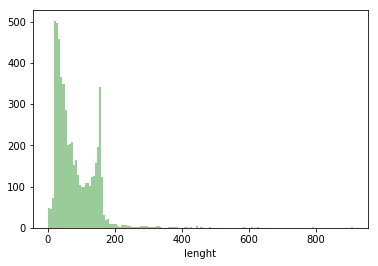

In [11]:
sns.distplot(dataset['lenght'],bins=150,kde=False,color='green')

In [12]:
dataset['lenght'].describe()

count    5574.000000
mean       80.478292
std        59.848302
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: lenght, dtype: float64

In [13]:
dataset[dataset['lenght']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000B7BBF1C358>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000B7BBEEC240>], dtype=object)

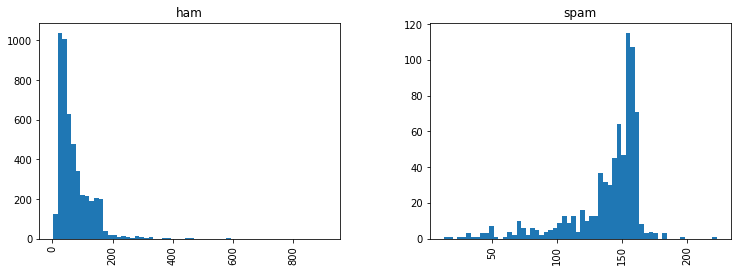

In [14]:
dataset.hist(column='lenght',by='label',bins=60,figsize=(12,4))

# Cleaning the texts

In [15]:
import re
import nltk

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\mayank
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [18]:


corpus = []
for i in range(0,len(dataset) ):
    review = re.sub('[^a-zA-Z]', ' ', dataset['message'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


# Vectorization

### Creating the Bag of Words model

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer(max_features =6296)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 0].values

In [21]:
X.shape

(5574, 6296)

In [22]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [25]:
print(cm)

[[1259  172]
 [  29  213]]
